# ImageNet Dataset

In [1]:
%matplotlib inline

import random
import numpy as np
import os
import requests
from PIL import Image
from glob import glob
from collections import Counter
from fractions import Fraction

import matplotlib.pyplot as plt

In [2]:
root_dir = '/users/barz/imagenet_large/'
img_dir = os.path.join(root_dir, 'ILSVRC2012_img_train')

## Load Class Names

In [3]:
class_index_url = 'https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json'
classes = dict(requests.get(class_index_url).json().values())
len(classes)

1000

In [4]:
class2idx = { lbl : i for i, lbl in enumerate(sorted(classes.keys())) }

## Example Images

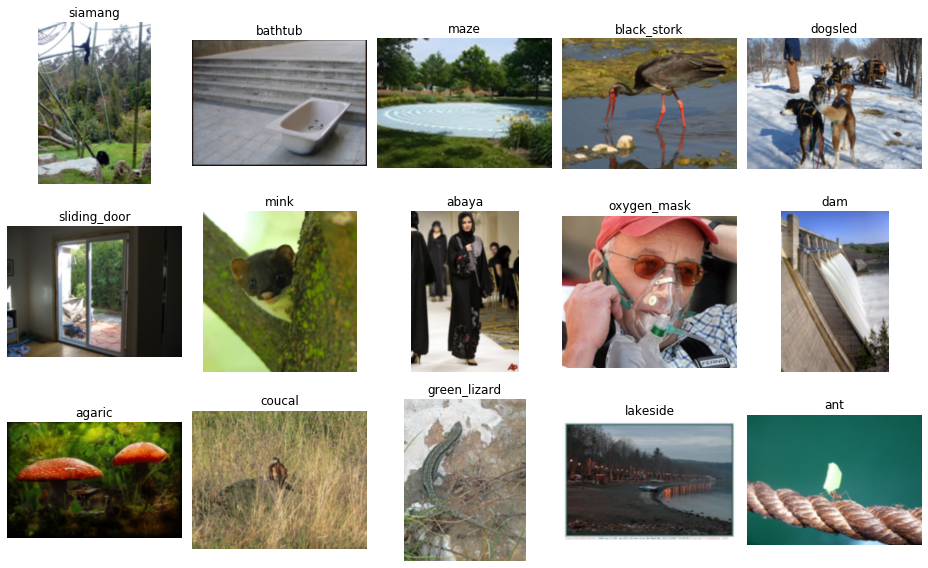

In [27]:
fig, axes = plt.subplots(3, 5, figsize=(13, 8))
for ax in axes.ravel():
    lbl = random.choice(os.listdir(img_dir))
    fn = random.choice(glob(os.path.join(img_dir, lbl, '*.JPEG')))
    ax.set_title(classes[lbl])
    ax.imshow(plt.imread(fn), interpolation='bicubic')
    ax.axis('off')
fig.tight_layout()
plt.show()

## Train/Val Split

    Train:  30 imgs/class
    Val:    20 imgs/class
    Test:   50 imgs/class (original test data)

In [37]:
class_members = {
    lbl : [fn for fn in os.listdir(os.path.join(img_dir, lbl)) if fn.endswith('.JPEG')]
    for lbl in classes.keys()
}
for mem in class_members.values():
    random.shuffle(mem)

In [39]:
with open(os.path.join(root_dir, 'train.txt'), 'w') as f:
    for lbl, mem in class_members.items():
        for fn in mem[:30]:
            f.write(f'{lbl}/{fn[:-5]} {class2idx[lbl]}\n')

with open(os.path.join(root_dir, 'val.txt'), 'w') as f:
    for lbl, mem in class_members.items():
        for fn in mem[30:50]:
            f.write(f'{lbl}/{fn[:-5]} {class2idx[lbl]}\n')


with open(os.path.join(root_dir, 'trainval.txt'), 'w') as f:
    for lbl, mem in class_members.items():
        for fn in mem[:50]:
            f.write(f'{lbl}/{fn[:-5]} {class2idx[lbl]}\n')

In [7]:
with open(os.path.join('.', 'classes.txt'), 'w') as f:
    for _, name in sorted(classes.items()):
        f.write(name + '\n')

## Image Sizes and Aspect Ratios in the `trainval` split

In [48]:
trainval_files = []
with open(os.path.join(root_dir, 'trainval.txt')) as f:
    trainval_files = [l.strip().split()[0] + '.JPEG' for l in f]
len(trainval_files)

50000

In [49]:
img_sizes = np.array([Image.open(os.path.join(img_dir, fn)).size for fn in trainval_files])

In [50]:
for ar, count in Counter(Fraction(int(max(s)), int(min(s))) for s in img_sizes).most_common(10):
    print(f'{ar.numerator:3d}:{ar.denominator:<3d} ({count/img_sizes.shape[0]:.1%})')

  4:3   (35.6%)
500:333 (12.5%)
  1:1   (3.3%)
250:167 (3.2%)
125:83  (1.9%)
  5:4   (1.2%)
  3:2   (1.2%)
100:67  (1.1%)
250:187 (0.8%)
500:357 (0.6%)


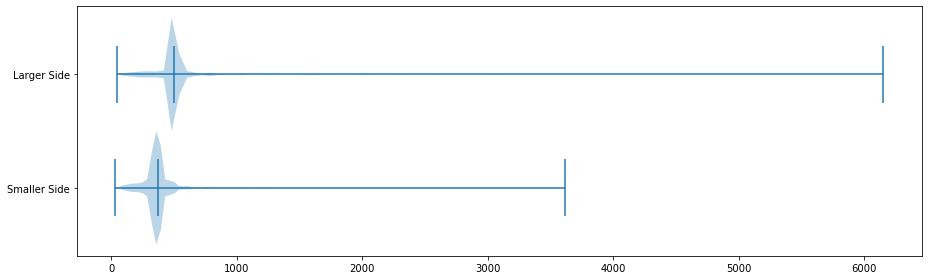

In [62]:
plt.figure(figsize=(13, 4))
plt.violinplot(np.sort(img_sizes, axis=-1), widths=1, vert=False, showmedians=True)
plt.yticks([1,2], ['Smaller Side', 'Larger Side'])
plt.tight_layout()
plt.show()